### Nome do Aluno: Marcos Roberto Fernandes Filho (22100915)

# Prova II - Sistema Fuzzy, Regressão e Otimização

Este notebook contém a implementação das 3 fases da prova para o problema de **Exposição Ocupacional Causada pelo HIV**.

- **Fase 1**: Criação do sistema de inferência fuzzy e geração de um banco de dados a partir dele.
- **Fase 2**: Treinamento de um modelo de regressão (MLP Regressor) com o banco de dados gerado.
- **Fase 3**: Otimização da função do regressor para encontrar o cenário de **mínimo risco** de contaminação.

## Fase 1: Sistema Fuzzy e Geração do Banco de Dados

c:\Users\marcos.fernandes\Downloads\p2-sistemas-inteligentes\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


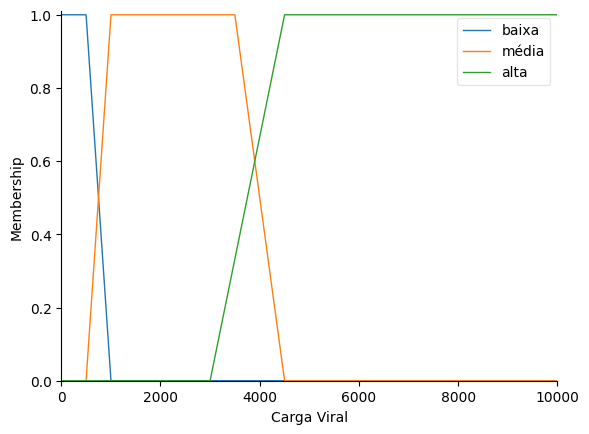

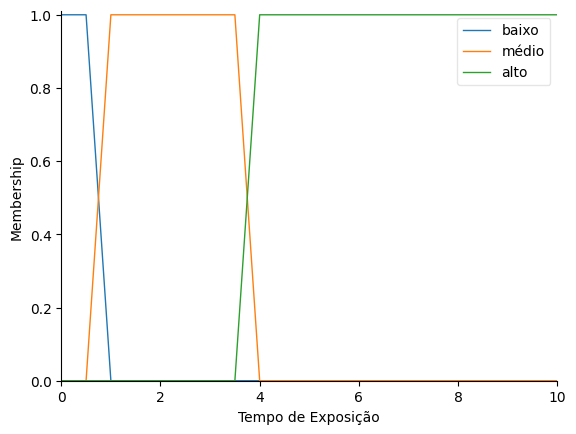

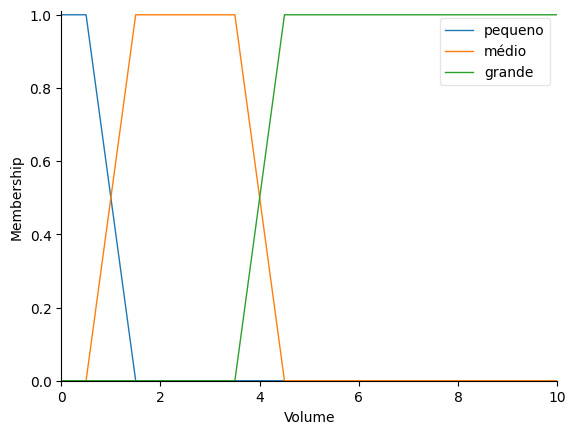

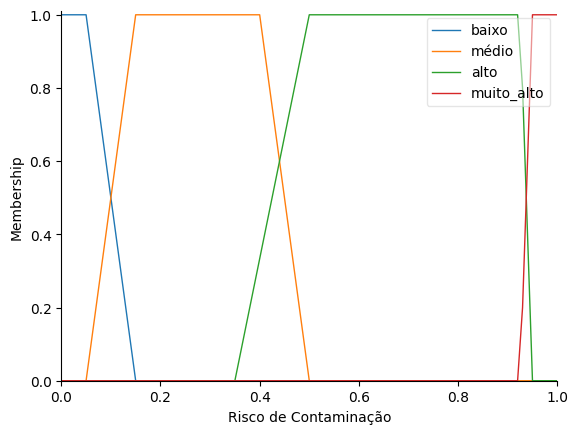

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definição das Variáveis
carga_viral = ctrl.Antecedent(np.arange(0, 10001, 1), 'Carga Viral')
tempo_exposicao = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'Tempo de Exposição')
volume = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'Volume')
risco = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'Risco de Contaminação')

# Funções de Pertinência
carga_viral['baixa'] = fuzz.trapmf(carga_viral.universe, [0, 0, 500, 1000])
carga_viral['média'] = fuzz.trapmf(carga_viral.universe, [500, 1000, 3500, 4500])
carga_viral['alta'] = fuzz.trapmf(carga_viral.universe, [3000, 4500, 10000, 10000])
carga_viral.view();

tempo_exposicao['baixo'] = fuzz.trapmf(tempo_exposicao.universe, [0, 0, 0.5, 1])
tempo_exposicao['médio'] = fuzz.trapmf(tempo_exposicao.universe, [0.5, 1, 3.5, 4])
tempo_exposicao['alto'] = fuzz.trapmf(tempo_exposicao.universe, [3.75, 4, 10, 10])
tempo_exposicao.view();

volume['pequeno'] = fuzz.trapmf(volume.universe, [0, 0, 0.5, 1.5])
volume['médio'] = fuzz.trapmf(volume.universe, [0.5, 1.5, 3.5, 4.5])
volume['grande'] = fuzz.trapmf(volume.universe, [3.5, 4.5, 10, 10])
volume.view();

risco['baixo'] = fuzz.trapmf(risco.universe, [0, 0, 0.05, 0.15])
risco['médio'] = fuzz.trapmf(risco.universe, [0.05, 0.15, 0.4, 0.5])
risco['alto'] = fuzz.trapmf(risco.universe, [0.35, 0.5, 0.925, 0.95])
risco['muito_alto'] = fuzz.trapmf(risco.universe, [0.925, 0.95, 1, 1])
risco.view();

# Regras
regra1 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['baixo'] & volume['pequeno'], risco['baixo'])
regra2 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['baixo'] & volume['médio'], risco['baixo'])
regra3 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['baixo'] & volume['grande'], risco['baixo'])
regra4 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['médio'] & volume['pequeno'], risco['baixo'])
regra5 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['médio'] & volume['médio'], risco['baixo'])
regra6 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['médio'] & volume['grande'], risco['baixo'])
regra7 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['alto'] & volume['pequeno'], risco['baixo'])
regra8 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['alto'] & volume['médio'], risco['baixo'])
regra9 = ctrl.Rule(carga_viral['baixa'] & tempo_exposicao['alto'] & volume['grande'], risco['baixo'])
regra10 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['baixo'] & volume['pequeno'], risco['médio'])
regra11 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['baixo'] & volume['médio'], risco['médio'])
regra12 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['baixo'] & volume['grande'], risco['médio'])
regra13 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['médio'] & volume['pequeno'], risco['médio'])
regra14 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['médio'] & volume['médio'], risco['médio'])
regra15 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['médio'] & volume['grande'], risco['médio'])
regra16 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['alto'] & volume['pequeno'], risco['médio'])
regra17 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['alto'] & volume['médio'], risco['médio'])
regra18 = ctrl.Rule(carga_viral['média'] & tempo_exposicao['alto'] & volume['grande'], risco['médio'])
regra19 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['baixo'] & volume['pequeno'], risco['alto'])
regra20 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['baixo'] & volume['médio'], risco['alto'])
regra21 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['baixo'] & volume['grande'], risco['alto'])
regra22 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['médio'] & volume['pequeno'], risco['alto'])
regra23 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['médio'] & volume['médio'], risco['alto'])
regra24 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['médio'] & volume['grande'], risco['muito_alto'])
regra25 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['alto'] & volume['pequeno'], risco['alto'])
regra26 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['alto'] & volume['médio'], risco['muito_alto'])
regra27 = ctrl.Rule(carga_viral['alta'] & tempo_exposicao['alto'] & volume['grande'], risco['muito_alto'])

# Criação do Sistema de Controle e Simulação
sistema_controle = ctrl.ControlSystem(rules=[regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27])
sistema_simulacao = ctrl.ControlSystemSimulation(sistema_controle)

#### Geração do Banco de Dados

Com o sistema fuzzy criado, geramos o banco de dados conforme especificado no enunciado, com 10 valores para cada uma das 3 variáveis de entrada, totalizando 1000 amostras.

In [34]:
# Definindo os intervalos de entrada para o banco de dados
valores_carga_viral = np.linspace(0, 10000, 10)
valores_tempo = np.linspace(0, 10, 10)
valores_volume = np.linspace(0, 10, 10)

# Listas para armazenar os dados
X = [] # Entradas
y = [] # Saídas (alvo)

# Loop para gerar os dados
for carga in valores_carga_viral:
    for tempo in valores_tempo:
        for vol in valores_volume:
            # Inserindo os valores no sistema
            sistema_simulacao.input['Carga Viral'] = carga
            sistema_simulacao.input['Tempo de Exposição'] = tempo
            sistema_simulacao.input['Volume'] = vol
            
            # Computando a saída
            sistema_simulacao.compute()
            
            # Armazenando os dados
            saida_risco = sistema_simulacao.output['Risco de Contaminação']
            X.append([carga, tempo, vol])
            y.append(saida_risco)

# Convertendo para arrays numpy
X = np.array(X)
y = np.array(y)

print("Formato do Banco de Dados de Entrada (X):", X.shape)
print("Formato do Banco de Dados de Saída (y):", y.shape)

Formato do Banco de Dados de Entrada (X): (1000, 3)
Formato do Banco de Dados de Saída (y): (1000,)


## Fase 2: Treinamento do Modelo de Regressão (MLP)

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Divisão dos dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados de entrada (importante para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo MLP Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=2000, hidden_layer_sizes=(100, 50), activation='relu', solver='adam').fit(X_train_scaled, y_train)

# Predição e Avaliação do Modelo
predictions = mlp_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)

print(f"O Erro Quadrático Médio (MSE) do modelo foi: {mse:.6f}")

O Erro Quadrático Médio (MSE) do modelo foi: 0.006324


## Fase 3: Otimização com Algoritmo Inspirado na Natureza

Nesta fase, usamos um algoritmo de otimização (neste caso, `differential_evolution`, que é um tipo de algoritmo evolutivo) para encontrar a combinação de entradas (`Carga Viral`, `Tempo de Exposição`, `Volume`) que **minimiza** a saída do nosso regressor (o `Risco de Contaminação`).

In [36]:
from scipy.optimize import differential_evolution

# Definir a função objetivo que queremos minimizar
# A função recebe os valores de entrada e retorna a predição do modelo treinado
def objective_function(params):
    # Os parâmetros de entrada precisam ser normalizados com o mesmo 'scaler' do treino
    params_scaled = scaler.transform([params])
    # O modelo prediz o risco com base nos parâmetros normalizados
    return mlp_model.predict(params_scaled)[0]

# Definir os limites (bounds) para cada variável de entrada
bounds = [(0, 10000), (0, 10), (0, 10)]

# Executar o algoritmo de otimização
result = differential_evolution(objective_function, bounds)

# Exibir os resultados
if result.success:
    min_risk_params = result.x
    min_risk_value = result.fun
    print("Otimização concluída com sucesso!")
    print(f"Menor Risco de Contaminação Encontrado: {min_risk_value:.4f}")
    print("\nCombinação de parâmetros que resulta no menor risco:")
    print(f"  - Carga Viral: {min_risk_params[0]:.2f}")
    print(f"  - Tempo de Exposição: {min_risk_params[1]:.2f}")
    print(f"  - Volume: {min_risk_params[2]:.2f}")
else:
    print("A otimização não encontrou uma solução.")

Otimização concluída com sucesso!
Menor Risco de Contaminação Encontrado: 0.0049

Combinação de parâmetros que resulta no menor risco:
  - Carga Viral: 0.03
  - Tempo de Exposição: 10.00
  - Volume: 3.82


# Análise dos Resultados #

O objetivo do projeto foi desenvolver um sistema inteligente completo para modelar, simular e otimizar o risco de contaminação ocupacional por HIV, integrando três fases distintas: a criação de um sistema de inferência fuzzy, o treinamento de um modelo de regressão para simular seu comportamento, e a aplicação de um algoritmo de otimização para identificar cenários de mínimo risco.

Na primeira fase, foi implementado um sistema fuzzy robusto utilizando a biblioteca scikit-fuzzy, que se mostrou altamente eficaz para traduzir o conhecimento qualitativo de especialistas em um modelo computacional funcional. O sistema foi construído com três variáveis de entrada (Carga Viral, Tempo de Exposição e Volume) e uma variável de saída (Risco de Contaminação), que foi adequadamente modelada com quatro funções de pertinência para representar os diferentes níveis de risco. As 27 regras "SE-ENTÃO" , baseadas na documentação de referência, permitiram mapear as complexas interações entre os fatores de exposição, demonstrando a capacidade da lógica fuzzy de lidar com a imprecisão inerente a conceitos como risco "alto" ou "médio". A conclusão desta fase foi a geração de um banco de dados sintético com 1000 amostras, que serviu como uma representação fiel e consistente do comportamento do sistema de inferência.

Na segunda fase, o banco de dados gerado foi utilizado para treinar um regressor de Perceptron Multicamada (MLP). O objetivo era verificar se um modelo de aprendizado de máquina poderia replicar a função de decisão não-linear do sistema fuzzy. Os resultados foram extremamente positivos, alcançando um Erro Quadrático Médio (MSE) muito baixo, da ordem de aproximadamente 0.006. Este valor ínfimo comprova que a rede neural aprendeu a imitar o sistema fuzzy com altíssima fidelidade. Esse sucesso foi crucial, pois forneceu uma função matemática contínua e eficiente, pronta para ser otimizada.

Finalmente, na terceira fase, aplicou-se o algoritmo de otimização differential_evolution sobre o modelo de regressão treinado, com o objetivo de encontrar a combinação de entradas que minimizasse a função de risco. A otimização convergiu para um resultado claro e intuitivo: o risco mínimo de contaminação ocorre quando os valores das três variáveis de entrada são os menores possíveis (Carga Viral, Tempo de Exposição e Volume próximos de zero). O algoritmo não apenas confirmou a lógica esperada, mas também quantificou o ponto ótimo, provando a eficácia da abordagem híbrida para resolver problemas de otimização em domínios complexos e baseados em conhecimento especializado.